# Linear Regression:
Linear regression is a statistical method for modeling relationships between a dependent variable with a given set of independent variables.

In Linear Regression, the hypothesis we used for prediction is:

## Simple Linear Regression:
Simple linear regression is an approach for predicting a response using a single feature.

###  Simple Linear Regression implementation in the Python:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def estimate_coef(x, y):
	# number of observations/points
	n = np.size(x)

	# mean of x and y vector
	m_x = np.mean(x)
	m_y = np.mean(y)

	# calculating cross-deviation and deviation about x
	SS_xy = np.sum(y*x) - n*m_y*m_x
	SS_xx = np.sum(x*x) - n*m_x*m_x

	# calculating regression coefficients
	b_1 = SS_xy / SS_xx
	b_0 = m_y - b_1*m_x

	return (b_0, b_1)

def meanSquaredError(y, y_pred):
    mse = np.sum(np.square(y - y_pred)) / np.size(y)
    return mse

Weight: 1.1696969696969697 
Intercept: 1.2363636363636363
Mean squared error: 0.5624242424242423


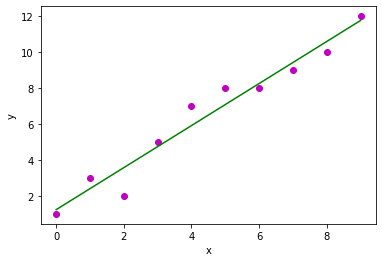

In [2]:
# observations / data
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12])

# estimating coefficients
b = estimate_coef(x, y)

# printing weight(slope) and intercept
print(f"Weight: {b[1]} \nIntercept: {b[0]}")

# predicted response vector
y_pred = b[0] + b[1]*x

# printing mean squared error
print("Mean squared error:", meanSquaredError(y, y_pred))

# plotting regression line
plt.scatter(x, y, color = "m")
plt.plot(x, y_pred, color = "g")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Simple Linear Regression Code In Python Sklearn:

In [3]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error

Weight: [1.16969697] 
Intercept: 1.2363636363636363
Mean squared error: 0.5624242424242423


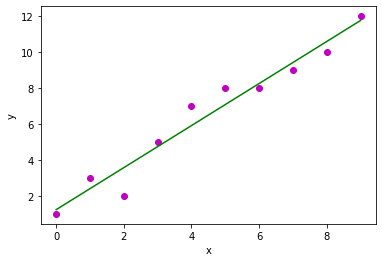

In [4]:
# observations / data
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]).reshape(-1, 1)
y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12])

# training the model
model = LinearRegression()
model.fit(x, y)

# printing weight(slope) and intercept
print(f"Weight: {model.coef_} \nIntercept: {model.intercept_}")

# predicted response vector
y_pred = model.predict(x)

# printing mean squared error
print("Mean squared error:", mean_squared_error(y, y_pred))

# plotting regression line
plt.scatter(x, y, color = "m")
plt.plot(x, y_pred, color = "g")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Example: Simple linear regression on sklearn inbuilt diabetes dataset.

In [5]:
from sklearn import datasets

# loading dataset
diabetes = datasets.load_diabetes()

In [6]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [7]:
print(diabetes['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

Weight: [975.5736137]
Intercept: 151.03058342562278
Mean squared error: 3743.846747811308


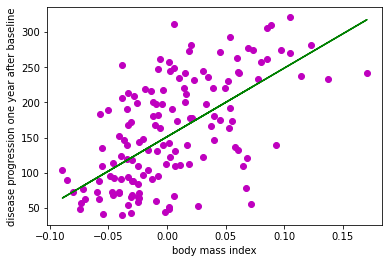

In [8]:
# taking only one feature bmi(body mass index)
diabetes_x = diabetes.data[:, np.newaxis, 2]

# taking first 300 instances for training
diabetes_x_train = diabetes_x[:300]
diabetes_y_train = diabetes.target[:300]

# taking rest of instances for testing
diabetes_x_test = diabetes_x[300:]
diabetes_y_test = diabetes.target[300:]

# training the model
model = LinearRegression()
model.fit(diabetes_x_train, diabetes_y_train)

# predicted response vector
diabetes_y_predict = model.predict(diabetes_x_test)

# printing weight(slope), intercept and mean square error
print("Weight:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean squared error:", mean_squared_error(diabetes_y_test, diabetes_y_predict))

# plotting regression line
plt.scatter(diabetes_x_test, diabetes_y_test, color = 'm')
plt.plot(diabetes_x_test, diabetes_y_predict, color = 'g')
plt.xlabel('body mass index')
plt.ylabel('disease progression one year after baseline')
plt.show()

## Multiple linear regression:
Multiple linear regression attempts to model the relationship between two or more features and a response by fitting a linear equation to the observed data.

### Example: Python implementation of multiple linear regression techniques on the Diabetes dataset using Scikit-learn

Weight: [ -16.57607993 -254.66532396  560.98630022  278.91811152 -393.41357305
   97.05460405  -19.0023093   169.46450327  632.95050374  114.21638941]
Variance score: 0.507199185218735
Mean squared error: 2794.5690145007325


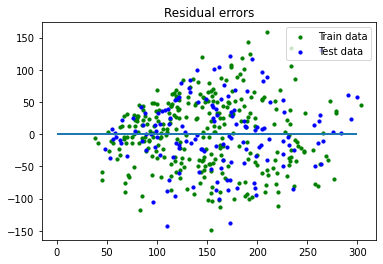

In [9]:
# defining feature matrix(X) and response vector(y)
X = diabetes.data
y = diabetes.target

# taking first 300 instances for training
X_train = X[:300]
y_train = y[:300]

# taking rest of instances for testing
X_test = X[300:]
y_test = y[300:]

# training the model
model = LinearRegression()
model.fit(X_train, y_train)

# predicted response vector
y_predict = model.predict(X_test)

# printing weight(regression coefficients), variance score(1 means perfect prediction) and mean square error
print("Weight:", model.coef_)
print("Variance score:", model.score(X_test, y_test))
print("Mean squared error:", mean_squared_error(y_test, y_predict))

# plotting residual errors in training & test data
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, color = "green", s = 10, label = 'Train data')
plt.scatter(y_predict, y_predict - y_test, color = "blue", s = 10, label = 'Test data')
 
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 300, linewidth = 2)

plt.legend(loc = 'upper right')
plt.title("Residual errors")
plt.show()

### Example: Python implementation of multiple linear regression techniques on the Boston house pricing dataset using Scikit-learn.

Weight: [-8.95714048e-02  6.73132853e-02  5.04649248e-02  2.18579583e+00
 -1.72053975e+01  3.63606995e+00  2.05579939e-03 -1.36602886e+00
  2.89576718e-01 -1.22700072e-02 -8.34881849e-01  9.40360790e-03
 -5.04008320e-01]
Variance score: 0.7209056672661767
Mean squared error: 25.205774702366593


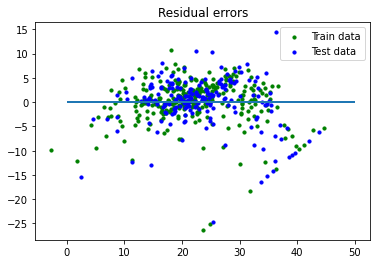

In [10]:
# load the boston dataset
boston = datasets.load_boston()
 
# defining feature matrix(X) and response vector(y)
X = boston.data
y = boston.target
 
# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

# training the model
model = LinearRegression()
model.fit(X_train, y_train)

# predicted response vector
y_predict = model.predict(X_test)

# printing weight(regression coefficients), variance score(1 means perfect prediction) and mean square error
print("Weight:", model.coef_)
print("Variance score:", model.score(X_test, y_test))
print("Mean squared error:", mean_squared_error(y_test, y_predict))

# plotting residual errors in training & test data
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, color = "green", s = 10, label = 'Train data')
plt.scatter(y_predict, y_predict - y_test, color = "blue", s = 10, label = 'Test data')
 
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)

plt.legend(loc = 'upper right')
plt.title("Residual errors")
plt.show()

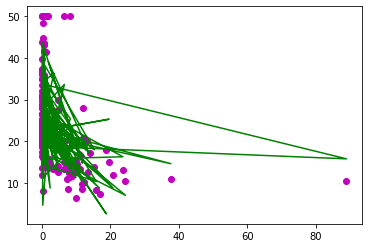

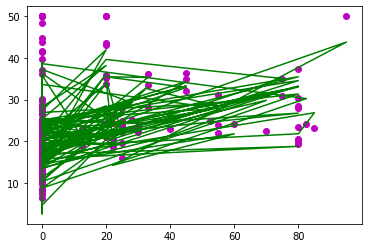

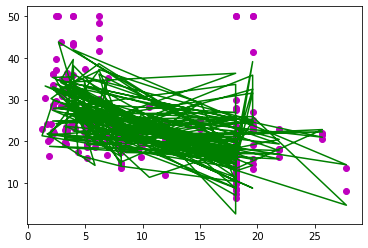

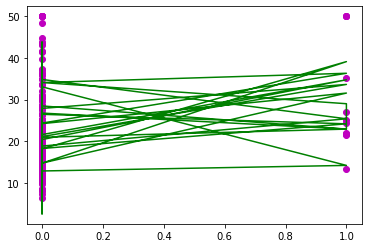

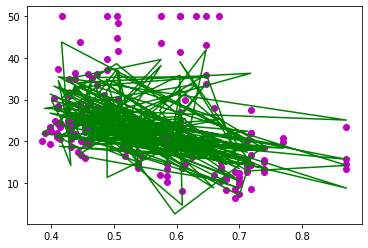

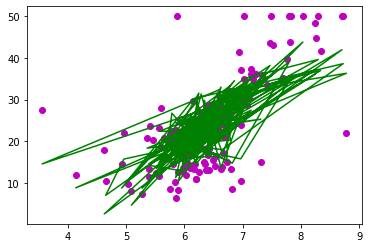

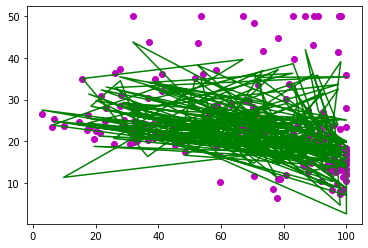

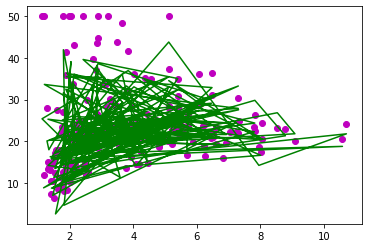

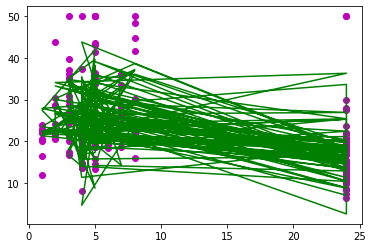

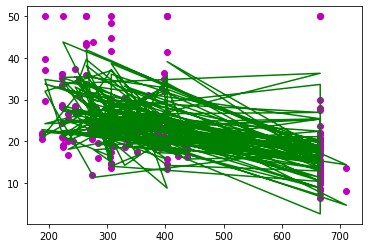

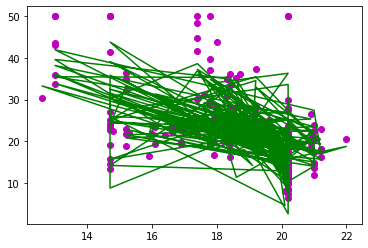

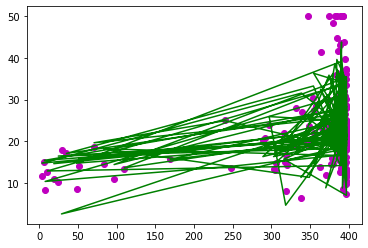

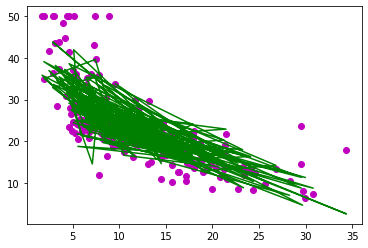

In [12]:
for i in range(X.shape[1]):
    plt.scatter(X_test[:, i], y_test, color='m')
    plt.plot(X_test[:, i], y_predict, color='g')
    plt.show()